In [2]:
%matplotlib inline

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt

In [4]:
from app.portfolio import Portfolio

In [5]:
tickers = ['AAPL', 'FB', 'MSFT', 'AMZN']
port = Portfolio(tickers)

In [12]:
prices = port.prices

In [13]:
prices.head()

,AAPL,FB,MSFT,AMZN
Date,,,,
2017-06-09,148.377964,149.63,69.595178,978.31
2017-06-12,144.732754,148.44,69.060744,964.83
2017-06-13,145.997622,150.68,69.921776,980.79
2017-06-14,144.573401,150.25,69.545693,976.47
2017-06-15,143.706917,149.80,69.179507,964.17


In [14]:
returns = prices.pct_change().dropna()

Text(0, 0.5, 'return')

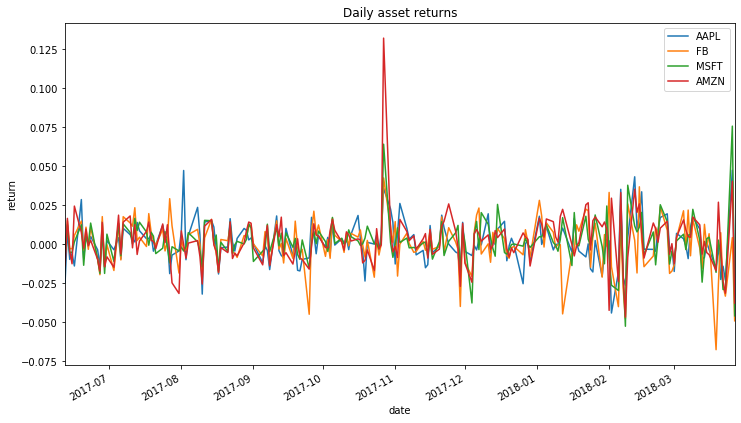

In [17]:
returns.plot(figsize=(12,7))

plt.title('Daily asset returns')
plt.xlabel('date')
plt.ylabel('return')

Generate random weights usings numpy random. Dividing by sum of random values ensures weights to be collectively equal to 1.0

In [30]:
def random_weights(n):
    """Produce random weights for a specified number of assets"""
    k = np.random.random(n) # generate random values between 0.0 and 1.0
    return k / sum(k)

Calculated expected return and standard deviation for a set of random weights

Values are calculated by the following formulas:

**Expected return**
$$R = p^T\omega$$

**Standard deviation**
$$\sigma = \sqrt{\omega^TC\omega}$$

In [187]:
def random_mu_sigma(returns):
    p = returns.mean().values
    w = random_weights(returns.shape[1])
    C = returns.cov().values
    
    mu = np.dot(w, p.T)
    sigma = np.sqrt(np.dot(np.dot(w, C), w.T))
    
    return mu, sigma

In [167]:
random_mu_sigma(returns)

(0.0012695446764946058, 0.012296867050699418)

In [206]:
scenarios = 1000

means, stds = np.array([random_mu_sigma(returns) for i in range(scenarios)]).T

Text(0, 0.5, 'Expected return')

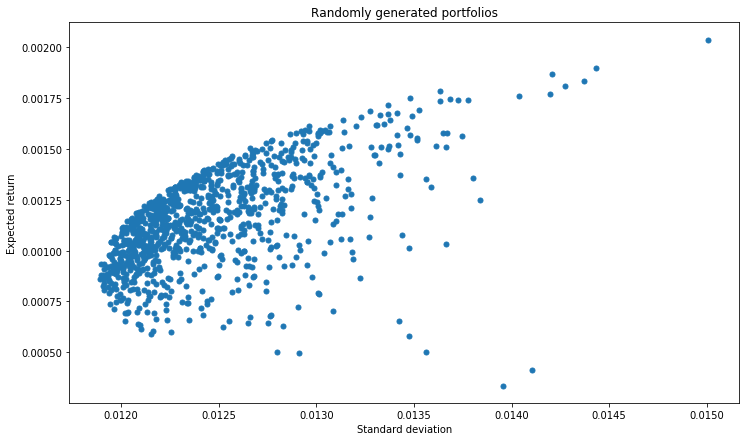

In [208]:
plt.figure(figsize=(12, 7))
plt.plot(stds, means, 'o', markersize=5)
plt.title('Randomly generated portfolios')
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')